In [3]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [9]:
file_path = 'variant_ighmbp2'
data = pd.read_csv(file_path, delimiter='\t')

data.head()

,gene,var_type,consequence,significance,origin,transcript,aa_ref,pos_aa,aa_alt,id,diseases,key
0,IGHMBP2,single nucleotide variant,missense,Pathogenic,germline,NM_002180.3,Glu,514,Lys,CV:24151,not provided|Charcot-Marie-Tooth disease axona...,11;68701934;68701934;na;na
1,IGHMBP2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline,NM_002180.3,His,213,Arg,CV:24152,Autosomal recessive distal spinal muscular atr...,11;68678998;68678998;na;na
2,IGHMBP2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline;inherited,NM_002180.3,Val,580,Ile,CV:24153,Charcot-Marie-Tooth disease axonal type 2S;Aut...,11;68702872;68702872;na;na
3,IGHMBP2,single nucleotide variant,stop_gain,Pathogenic,germline,NM_002180.3,Gln,41,Ter,CV:24154,Autosomal recessive distal spinal muscular atr...,11;68673571;68673571;na;na
4,IGHMBP2,Deletion,frameshift,Pathogenic/Likely pathogenic,germline,NM_002180.3,Glu,226,fs,CV:24155,Autosomal recessive distal spinal muscular atr...,11;68679034;68679034;na;na


In [10]:
data.head()

,gene,var_type,consequence,significance,origin,transcript,aa_ref,pos_aa,aa_alt,id,diseases,key
0,IGHMBP2,single nucleotide variant,missense,Pathogenic,germline,NM_002180.3,Glu,514,Lys,CV:24151,not provided|Charcot-Marie-Tooth disease axona...,11;68701934;68701934;na;na
1,IGHMBP2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline,NM_002180.3,His,213,Arg,CV:24152,Autosomal recessive distal spinal muscular atr...,11;68678998;68678998;na;na
2,IGHMBP2,single nucleotide variant,missense,Pathogenic/Likely pathogenic,germline;inherited,NM_002180.3,Val,580,Ile,CV:24153,Charcot-Marie-Tooth disease axonal type 2S;Aut...,11;68702872;68702872;na;na
3,IGHMBP2,single nucleotide variant,stop_gain,Pathogenic,germline,NM_002180.3,Gln,41,Ter,CV:24154,Autosomal recessive distal spinal muscular atr...,11;68673571;68673571;na;na
4,IGHMBP2,Deletion,frameshift,Pathogenic/Likely pathogenic,germline,NM_002180.3,Glu,226,fs,CV:24155,Autosomal recessive distal spinal muscular atr...,11;68679034;68679034;na;na


In [11]:
data.groupby('consequence').significance.value_counts()

consequence           significance                                
3-UTR                 Uncertain significance                           22
                      Likely benign                                     7
                      Benign                                            5
                      Benign/Likely benign                              2
                      Conflicting classifications of pathogenicity      1
5-UTR                 Likely benign                                     5
                      Benign                                            4
                      Uncertain significance                            2
copy number           Likely pathogenic                                 1
deletion              Pathogenic                                       10
                      Uncertain significance                            6
                      Likely benign                                     1
                      Likely pathogenic      

In [16]:
conseq_signi = (data
 .groupby('consequence')
 .significance
 .value_counts()
 .unstack()
 .fillna(0)
)

<Axes: xlabel='significance', ylabel='consequence'>

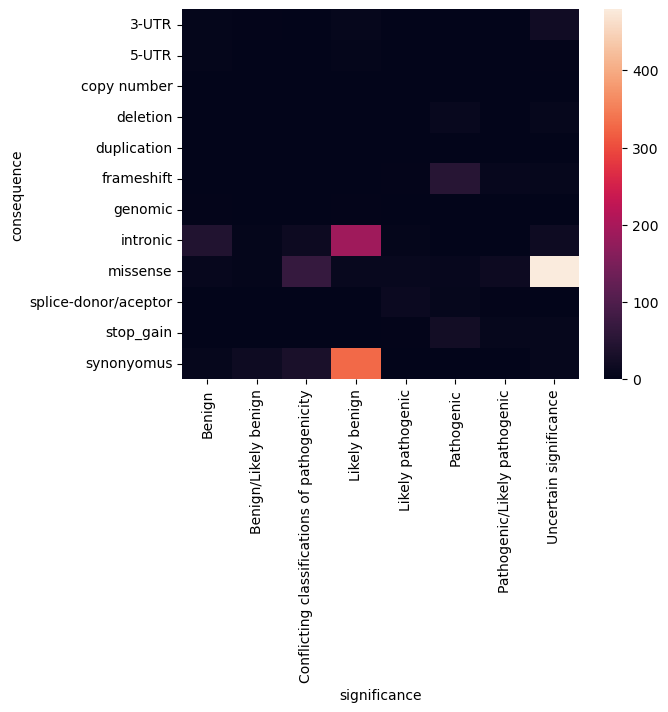

In [17]:
sns.heatmap(conseq_signi)

## Transpose 

In [19]:
conseq_signi.T

consequence,3-UTR,5-UTR,copy number,deletion,duplication,frameshift,genomic,intronic,missense,splice-donor/aceptor,stop_gain,synonyomus
significance,,,,,,,,,,,,
Benign,5.0,4.0,0.0,0.0,0.0,0.0,2.0,43.0,8.0,0.0,0.0,7.0
Benign/Likely benign,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,18.0
Conflicting classifications of pathogenicity,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,68.0,0.0,0.0,32.0
Likely benign,7.0,5.0,0.0,1.0,0.0,0.0,2.0,190.0,10.0,0.0,0.0,329.0
Likely pathogenic,0.0,0.0,1.0,1.0,1.0,3.0,0.0,4.0,11.0,14.0,3.0,0.0
Pathogenic,0.0,0.0,0.0,10.0,0.0,50.0,0.0,0.0,8.0,7.0,24.0,0.0
Pathogenic/Likely pathogenic,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,15.0,3.0,7.0,0.0
Uncertain significance,22.0,2.0,0.0,6.0,0.0,7.0,1.0,18.0,479.0,0.0,6.0,7.0


<Axes: xlabel='significance', ylabel='consequence'>

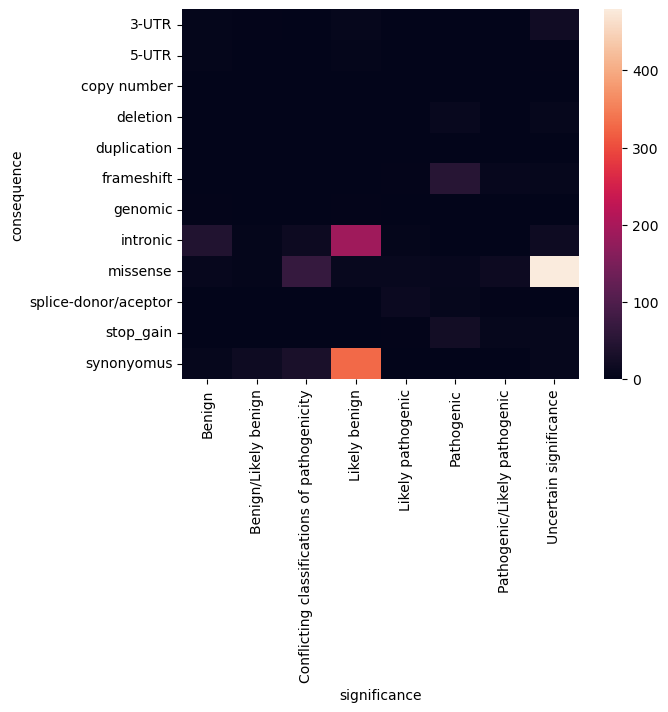

In [21]:
sns.heatmap(conseq_signi)

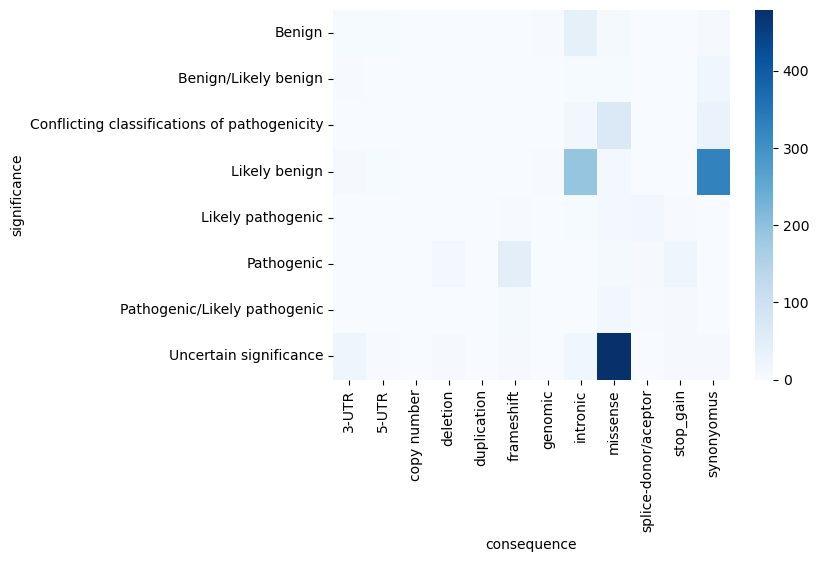

In [23]:
sns.heatmap(conseq_signi.T, cmap="Blues");

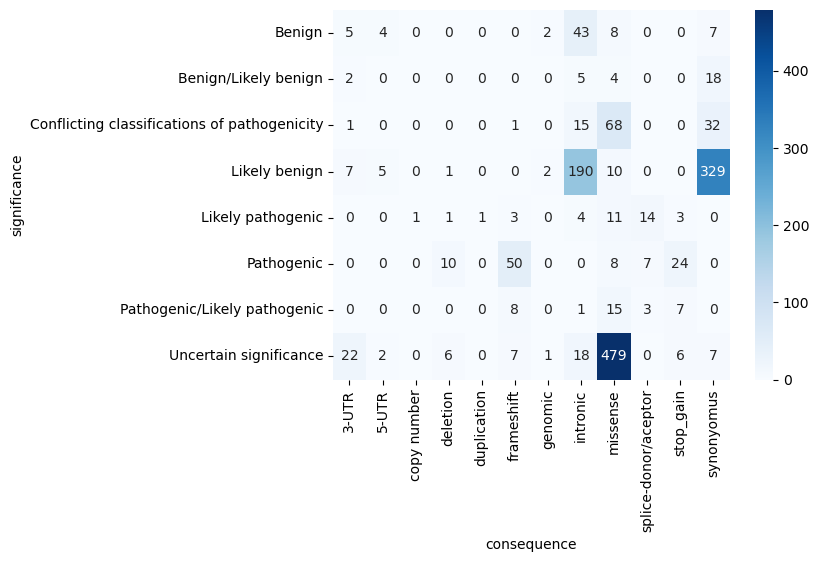

In [25]:
sns.heatmap(conseq_signi.T, cmap="Blues", annot=True, fmt=".0f");

In [26]:
conseq_signi

significance,Benign,Benign/Likely benign,Conflicting classifications of pathogenicity,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance
consequence,,,,,,,,
3-UTR,5.0,2.0,1.0,7.0,0.0,0.0,0.0,22.0
5-UTR,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
deletion,0.0,0.0,0.0,1.0,1.0,10.0,0.0,6.0
duplication,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
frameshift,0.0,0.0,1.0,0.0,3.0,50.0,8.0,7.0
genomic,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
intronic,43.0,5.0,15.0,190.0,4.0,0.0,1.0,18.0
missense,8.0,4.0,68.0,10.0,11.0,8.0,15.0,479.0


In [27]:
conseq_signi_1 = conseq_signi

In [28]:
conseq_signi_1.columns

Index(['Benign', 'Benign/Likely benign',
       'Conflicting classifications of pathogenicity', 'Likely benign',
       'Likely pathogenic', 'Pathogenic', 'Pathogenic/Likely pathogenic',
       'Uncertain significance'],
      dtype='object', name='significance')

In [31]:
conseq_signi_1.index

Index(['3-UTR', '5-UTR', 'copy number', 'deletion', 'duplication',
       'frameshift', 'genomic', 'intronic', 'missense', 'splice-donor/aceptor',
       'stop_gain', 'synonyomus'],
      dtype='object', name='consequence')

In [33]:
conseq_signi_1['Likely Benign'] = conseq_signi_1['Benign/Likely benign'] + conseq_signi_1['Likely benign']

In [34]:
conseq_signi_1.head()

significance,Benign,Benign/Likely benign,Conflicting classifications of pathogenicity,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,Likely Benign
consequence,,,,,,,,,
3-UTR,5.0,2.0,1.0,7.0,0.0,0.0,0.0,22.0,9.0
5-UTR,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,5.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,0.0,1.0,1.0,10.0,0.0,6.0,1.0
duplication,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
conseq_signi_1 = conseq_signi_1.drop(['Benign/Likely benign', 'Likely benign'], axis=1)

In [38]:
conseq_signi_1.head()

significance,Benign,Conflicting classifications of pathogenicity,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,Likely Benign
consequence,,,,,,,
3-UTR,5.0,1.0,0.0,0.0,0.0,22.0,9.0
5-UTR,4.0,0.0,0.0,0.0,0.0,2.0,5.0
copy number,0.0,0.0,1.0,0.0,0.0,0.0,0.0
deletion,0.0,0.0,1.0,10.0,0.0,6.0,1.0
duplication,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
conseq_signi_1['Likely Pathogenic'] = conseq_signi_1['Likely pathogenic'] + conseq_signi_1['Pathogenic/Likely pathogenic']

In [40]:
conseq_signi_1.head()

significance,Benign,Conflicting classifications of pathogenicity,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic,Uncertain significance,Likely Benign,Likely Pathogenic
consequence,,,,,,,,
3-UTR,5.0,1.0,0.0,0.0,0.0,22.0,9.0,0.0
5-UTR,4.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0
copy number,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
deletion,0.0,0.0,1.0,10.0,0.0,6.0,1.0,1.0
duplication,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
conseq_signi_1 = conseq_signi_1.drop(['Likely pathogenic','Pathogenic/Likely pathogenic'], axis = 1)

In [42]:
conseq_signi_1.head()

significance,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,Likely Benign,Likely Pathogenic
consequence,,,,,,
3-UTR,5.0,1.0,0.0,22.0,9.0,0.0
5-UTR,4.0,0.0,0.0,2.0,5.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,1.0
deletion,0.0,0.0,10.0,6.0,1.0,1.0
duplication,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
conseq_signi_1

significance,Benign,Conflicting classifications of pathogenicity,Pathogenic,Uncertain significance,Likely Benign,Likely Pathogenic
consequence,,,,,,
3-UTR,5.0,1.0,0.0,22.0,9.0,0.0
5-UTR,4.0,0.0,0.0,2.0,5.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,1.0
deletion,0.0,0.0,10.0,6.0,1.0,1.0
duplication,0.0,0.0,0.0,0.0,0.0,1.0
frameshift,0.0,1.0,50.0,7.0,0.0,11.0
genomic,2.0,0.0,0.0,1.0,2.0,0.0
intronic,43.0,15.0,0.0,18.0,195.0,5.0
missense,8.0,68.0,8.0,479.0,14.0,26.0


In [46]:
conseq_signi_2 = conseq_signi_1

### change the order of columns 

In [47]:
conseq_signi_2 = conseq_signi_2.rename(columns={
    "Conflicting classifications of pathogenicity": "Conflicting",
    "Uncertain significance": "Uncertain",
})

In [48]:
conseq_signi_2

significance,Benign,Conflicting,Pathogenic,Uncertain,Likely Benign,Likely Pathogenic
consequence,,,,,,
3-UTR,5.0,1.0,0.0,22.0,9.0,0.0
5-UTR,4.0,0.0,0.0,2.0,5.0,0.0
copy number,0.0,0.0,0.0,0.0,0.0,1.0
deletion,0.0,0.0,10.0,6.0,1.0,1.0
duplication,0.0,0.0,0.0,0.0,0.0,1.0
frameshift,0.0,1.0,50.0,7.0,0.0,11.0
genomic,2.0,0.0,0.0,1.0,2.0,0.0
intronic,43.0,15.0,0.0,18.0,195.0,5.0
missense,8.0,68.0,8.0,479.0,14.0,26.0


### change the order of columns

In [50]:
my_order = [
    "Benign",
    "Likely Benign",
    "Conflicting",
    "Uncertain",
    "Likely Pathogenic",
    "Pathogenic"
]

In [51]:
conseq_signi_2 = conseq_signi_2[my_order]

In [52]:
conseq_signi_2

significance,Benign,Likely Benign,Conflicting,Uncertain,Likely Pathogenic,Pathogenic
consequence,,,,,,
3-UTR,5.0,9.0,1.0,22.0,0.0,0.0
5-UTR,4.0,5.0,0.0,2.0,0.0,0.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0
deletion,0.0,1.0,0.0,6.0,1.0,10.0
duplication,0.0,0.0,0.0,0.0,1.0,0.0
frameshift,0.0,0.0,1.0,7.0,11.0,50.0
genomic,2.0,2.0,0.0,1.0,0.0,0.0
intronic,43.0,195.0,15.0,18.0,5.0,0.0
missense,8.0,14.0,68.0,479.0,26.0,8.0


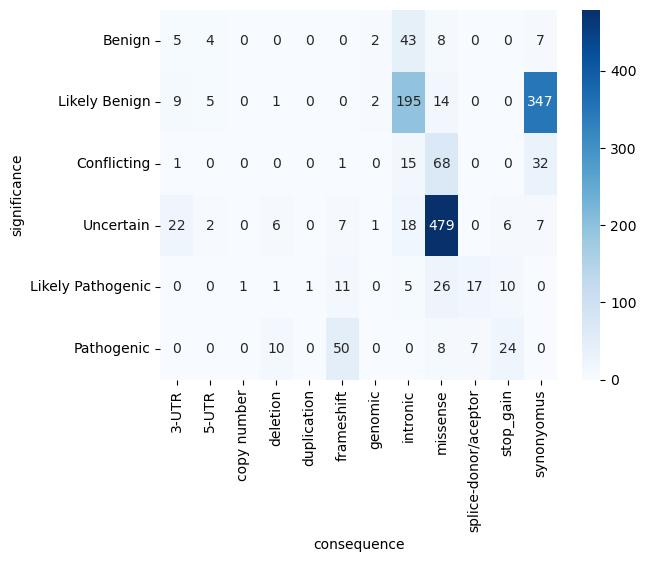

In [53]:
sns.heatmap(conseq_signi_2.T, cmap="Blues", annot=True, fmt=".0f");

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

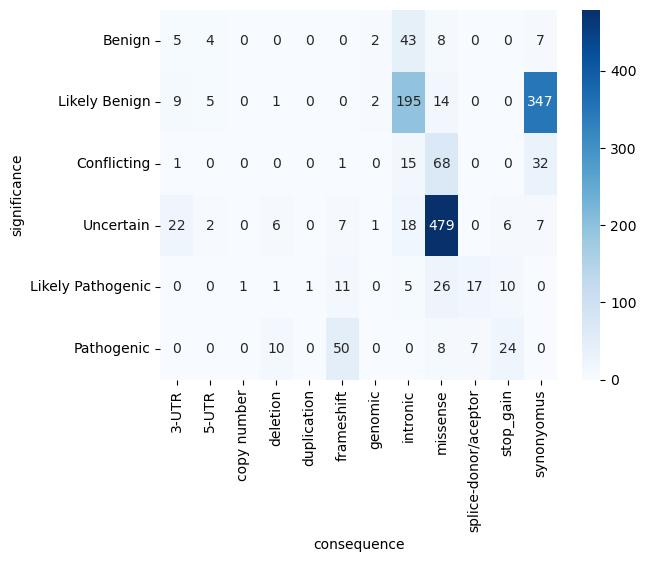

In [55]:
sns.heatmap(conseq_signi_2.T, cmap="Blues", annot=True, fmt=".0f");

plt.savefig("ighmbp2_heatmap.png", dpi=300, bbox_inches="tight")  # dpi=300 for high quality
plt.close

### adding the totoal of each row and column 

In [68]:
conseq_signi_3 = conseq_signi_2.copy()

In [72]:
# Add sum of each row
conseq_signi_3["Row Total"] = conseq_signi_3.sum(axis=1)

# Add sum of each column
conseq_signi_3.loc["Column Total"] = conseq_signi_3.sum(axis=0)


In [93]:
conseq_signi_3

significance,Benign,Likely Benign,Conflicting,Uncertain,Likely Pathogenic,Pathogenic,Row Total
consequence,,,,,,,
3-UTR,5.0,9.0,1.0,22.0,0.0,0.0,37.0
5-UTR,4.0,5.0,0.0,2.0,0.0,0.0,11.0
copy number,0.0,0.0,0.0,0.0,1.0,0.0,1.0
deletion,0.0,1.0,0.0,6.0,1.0,10.0,18.0
duplication,0.0,0.0,0.0,0.0,1.0,0.0,1.0
frameshift,0.0,0.0,1.0,7.0,11.0,50.0,69.0
genomic,2.0,2.0,0.0,1.0,0.0,0.0,5.0
intronic,43.0,195.0,15.0,18.0,5.0,0.0,276.0
missense,8.0,14.0,68.0,479.0,26.0,8.0,603.0


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

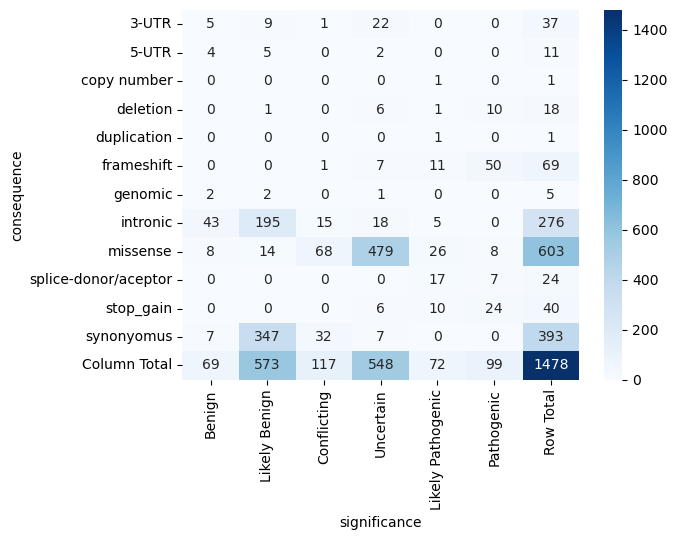

In [92]:
sns.heatmap(conseq_signi_3, cmap="Blues", annot=True, fmt=".0f");

plt.savefig("ighmbp2_heatmap.png", dpi=300, bbox_inches="tight")  # dpi=300 for high quality
plt.close